In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

# Problem Statement: Building Stock Portfolios
Create pools of stocks that move together on one or more fundamental financial metric. In simple words, the goal is to group stocks that exhibit similar patterns or trends in one or more fundamental financial metrics.

### Steps to create stock pools
1. Gather data: Collect historical data for the financial metrics that are choosen.
2. Preprocess data: Clean and normalize the data as needed.
3. Select similarity metric: Choose a suitable metric based on the requirements.
4. Apply clustering algorithm: Use the chosen algorithm to group the stocks based on their similarity in the selected metrics.
5. Analyze and interpret the results: Examine the resulting clusters to identify stocks with similar characteristics.

### Importing the Dataset
The purpose of this dataset to get the list of companies which are stored in the "Symbol" column. Once the dataset is imported, the company symbols are stored in a list.

In [3]:
# importing dataset
df_stocks = pd.read_csv("ind_nifty50list.csv")
df_stocks.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [4]:
# storing the symbols in a list
symbols_list = list(df_stocks["Symbol"])
symbols_list

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'IOC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SHREECEM',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

Once the symbols are extracted into a list, a `.NS` is concatenated at the end of every symbol to fetch the data from Yahoo Finance.

In [5]:
yf_symbols = list(map(lambda x: x + ".NS", symbols_list))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

Defining a few variable/ financial metrics, and fetching the corresponding data from `yfinance` for the companies in the list.

In [6]:
import yfinance as yf

stock_financials = {
    "marketCap": [],
    "regularMarketVolume": [],
    "earningsQuarterlyGrowth": [],
    "bookValue": [],
    "totalRevenue": [],
    "returnOnAssets": [],
    "profitMargins": [],
    "earningsGrowth": []
}

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials["marketCap"].append(stock_info.get("marketCap", None))
    stock_financials["regularMarketVolume"].append(stock_info.get("regularMarketVolume", None))
    stock_financials["earningsQuarterlyGrowth"].append(stock_info.get("earningsQuarterlyGrowth", None))
    stock_financials["bookValue"].append(stock_info.get("bookValue", None))
    stock_financials["totalRevenue"].append(stock_info.get("totalRevenue", None))
    stock_financials["returnOnAssets"].append(stock_info.get("returnOnAssets", None))
    stock_financials["profitMargins"].append(stock_info.get("profitMargins", None))
    stock_financials["earningsGrowth"].append(stock_info.get("earningsGrowth", None))

In [7]:
df = pd.DataFrame(stock_financials)
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,3.057354e+12,415165.0,0.472,244.328,2.741933e+11,NaN,0.33220,0.472
1,3.167640e+12,237293.0,-0.245,195.250,3.522494e+11,NaN,0.14421,-0.246
2,3.565012e+12,829299.0,0.057,534.043,6.497045e+11,0.01887,0.41144,0.050
3,3.037523e+12,47968.0,0.181,1037.411,4.776608e+11,NaN,0.16761,0.198
4,4.543736e+12,183038.0,0.138,1241.009,3.295906e+11,NaN,0.45287,0.115


In [8]:
df.shape

(50, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                49 non-null     float64
 1   regularMarketVolume      49 non-null     float64
 2   earningsQuarterlyGrowth  48 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             49 non-null     float64
 5   returnOnAssets           11 non-null     float64
 6   profitMargins            49 non-null     float64
 7   earningsGrowth           47 non-null     float64
dtypes: float64(8)
memory usage: 3.3 KB


### Downloading Adjusted Closing Price (Adj Close)
It is a stock price that has been adjusted to reflect the effects of corporate actions such as stock splits, dividends, and rights offerings. It provides a more accurate representation of stock's historical performance by accounting for factors that can artifically inflate or deflate the closing price.

In [10]:
stock_prices = yf.download(yf_symbols, start = "2020-01-01")["Adj Close"]
stock_prices.columns = symbols_list

[*********************100%***********************]  50 of 50 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [11]:
stock_prices.shape

(1161, 50)

In [12]:
stock_prices.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,COALINDIA,DIVISLAB,DRREDDY,EICHERMOT,GRASIM,HCLTECH,HDFCBANK,HDFCLIFE,HEROMOTOCO,HINDALCO,HINDUNILVR,HDFC,ICICIBANK,ITC,IOC,INDUSINDBK,INFY,JSWSTEEL,KOTAKBANK,LT,M&M,MARUTI,NTPC,NESTLEIND,ONGC,POWERGRID,RELIANCE,SBILIFE,SHREECEM,SBIN,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-09-03 00:00:00+00:00,1479.550049,3154.850098,1191.599976,11043.650391,1865.599976,7353.799805,1560.599976,355.399994,5916.049805,1653.199951,519.599976,5066.000000,6853.850098,4865.799805,2706.850098,1790.449951,NaN,1637.349976,758.750000,5646.500000,678.900024,2794.300049,1247.699951,1436.699951,1941.250000,176.130005,509.399994,930.950012,1783.800049,3690.149902,2784.850098,12397.099609,2530.750000,406.399994,322.200012,334.649994,3018.250000,1928.650024,824.799988,25507.599609,1811.500000,1199.000000,1085.099976,152.149994,4512.350098,1644.099976,3621.149902,11460.799805,602.200012,536.049988
2024-09-04 00:00:00+00:00,1472.099976,3231.649902,1177.699951,10963.700195,1871.900024,7299.500000,1561.900024,357.250000,5926.549805,1651.900024,503.649994,5096.600098,6787.200195,4833.549805,2757.649902,1785.250000,NaN,1641.800049,758.799988,5683.750000,666.799988,2841.250000,1236.349976,1434.400024,1922.449951,177.029999,506.350006,933.049988,1783.800049,3650.800049,2749.600098,12336.250000,2534.750000,405.100006,314.399994,332.899994,3029.100098,1912.199951,816.500000,25770.750000,1832.849976,1194.949951,1080.449951,151.179993,4479.250000,1645.300049,3607.699951,11580.450195,607.849976,519.150024
2024-09-05 00:00:00+00:00,1465.550049,3238.250000,1180.550049,10855.750000,1864.949951,7244.899902,1547.199951,360.700012,5850.000000,1627.750000,497.000000,5120.899902,6695.750000,4800.100098,2741.600098,1790.550049,NaN,1645.449951,751.849976,5734.200195,669.950012,2838.449951,1235.949951,1422.900024,1933.150024,181.339996,511.200012,925.450012,1777.949951,3624.149902,2723.100098,12298.599609,2504.899902,403.250000,311.399994,331.250000,2985.949951,1907.849976,818.750000,25662.250000,1826.500000,1188.650024,1069.150024,151.720001,4475.950195,1639.500000,3722.850098,11542.650391,618.700012,524.849976
2024-09-06 00:00:00+00:00,1442.400024,3273.699951,1158.750000,10830.099609,1857.150024,7317.149902,1539.250000,352.149994,5843.549805,1611.050049,488.549988,5137.799805,6667.149902,4752.500000,2692.850098,1756.099976,NaN,1636.949951,738.400024,5743.750000,667.099976,2838.949951,1208.150024,1409.349976,1901.849976,176.639999,501.700012,932.799988,1764.150024,3574.750000,2698.100098,12186.150391,2503.199951,394.799988,308.799988,329.799988,2929.649902,1896.300049,782.500000,25610.449219,1824.550049,1173.849976,1049.349976,151.220001,4456.750000,1623.250000,3695.500000,11432.849609,609.799988,520.599976
2024-09-09 00:00:00+00:00,1415.000000,3303.399902,1152.300049,10846.200195,1866.500000,NaN,1534.849976,351.750000,5897.950195,1618.650024,486.850006,5117.899902,6704.799805,4739.649902,2694.750000,1754.000000,NaN,1639.250000,744.250000,5717.549805,657.599976,2858.199951,NaN,1414.500000,1907.550049,176.250000,503.649994,934.900024,1765.000000,3565.399902,2666.800049,12159.099609,2499.399902,389.200012,299.799988,326.200012,2933.899902,1915.199951,780.349976,25501.250000,1821.550049,1184.099976,1043.500000,149.240005,4469.200195,1614.250000,3683.000000,11369.250000,608.549988,516.549988


In [16]:
# extracting stock_prices only from the year 2020
prices_2020 = stock_prices.loc["2020-01-01 00:00:00": "2020-12-31 00:00:00"]

# Calculating the percentage growth of the stock price from 2020-01-02 to 2020-08-04
stock_prices.loc["returns_2020"] = (prices_2020.loc["2020-08-04 00:00:00"])/ (prices_2020.loc["2020-01-02 00:00:00"] - 1) * 100
stock_prices

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,COALINDIA,DIVISLAB,DRREDDY,EICHERMOT,GRASIM,HCLTECH,HDFCBANK,HDFCLIFE,HEROMOTOCO,HINDALCO,HINDUNILVR,HDFC,ICICIBANK,ITC,IOC,INDUSINDBK,INFY,JSWSTEEL,KOTAKBANK,LT,M&M,MARUTI,NTPC,NESTLEIND,ONGC,POWERGRID,RELIANCE,SBILIFE,SHREECEM,SBIN,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,364.348297,1726.791138,745.451965,2703.128906,935.670654,4160.838867,436.938934,180.400528,2751.210693,458.291138,131.486252,1745.139526,2790.024902,2115.296143,724.159119,486.583832,NaN,1227.428589,613.773560,2074.082031,207.269089,1802.972290,518.854004,1433.394531,663.080200,56.667084,193.003769,249.207748,1669.007446,1203.410278,508.507782,7020.507324,1403.387085,93.288544,94.034653,82.488068,1356.042725,967.813721,314.799194,19948.824219,412.528442,311.602081,183.311234,18.817577,2020.287231,655.840698,1128.044312,3967.757568,556.150757,242.605286
2020-01-02 00:00:00+00:00,369.654602,1724.335205,753.666199,2678.157715,948.356201,4175.343262,438.770386,178.896118,2763.655762,455.979950,130.958954,1751.903687,2775.974854,2069.786621,747.420044,487.945068,NaN,1235.252441,626.415405,2071.438965,212.927155,1804.368896,522.575684,1476.561646,661.145508,57.139492,194.422348,256.969360,1666.514893,1235.885132,511.587555,7037.934082,1398.667847,93.173409,94.477348,82.319298,1379.128662,960.825623,319.364166,20844.416016,413.145874,311.121033,192.553818,19.505508,2011.013306,659.240051,1128.874756,4143.256348,562.957886,243.192963
2020-01-03 00:00:00+00:00,369.027527,1686.538940,739.726929,2636.153809,932.418274,4123.619141,438.673981,177.410065,2750.441650,452.561279,131.424255,1760.443115,2794.385254,2030.347290,737.959717,497.728485,NaN,1217.636841,622.909302,2073.911621,209.348557,1794.499878,520.884033,1476.416748,671.314209,57.072006,193.328003,253.251266,1652.108398,1226.468872,504.859375,6965.345215,1385.777344,91.600067,94.772484,81.433243,1380.790405,966.525024,314.093231,20736.519531,422.312134,306.165802,189.920181,19.459242,2051.090820,667.028198,1113.342285,4118.269043,558.514343,245.935379
2020-01-06 00:00:00+00:00,366.808533,1643.927734,720.112366,2606.634521,902.173523,3930.145264,433.420685,172.144638,2735.280762,449.479706,127.608971,1763.849121,2789.491943,1998.841797,718.795044,495.133881,NaN,1191.285522,611.897034,2019.172485,202.433136,1783.327637,508.172363,1419.005615,664.880066,56.194660,190.571976,245.629074,1647.572266,1209.657104,497.041260,6761.932129,1368.974487,91.254684,93.149284,81.475433,1348.766724,974.454712,300.256927,20679.730469,417.895264,300.296478,184.503815,19.038843,2050.904541,662.983521,1131.805420,4057.654297,553.030884,246.963760
2020-01-07 00:00:00+00:00,371.246460,1660.538696,722.601562,2606.891846,907.456177,3940.913086,429.034912,169.154175,2748.449951,451.261261,127.608971,1769.174316,2794.675537,1993.413330,723.964111,497.048004,NaN,1210.148926,622.168518,2002.034302,201.997894,1788.215454,505.465851,1411.521484,655.026306,56.037189,190.774628,246.558578,1665.817139,1213.102173,499.078674,6791.889648,1357.019165,92.521049,92.780373,80.884727,1369.517090,976.239014,299.692169,21562.068359,424.021912,302.990601,183.559677,19.153496,2055.938232,668.749329,1133.124146,4140.620605,562.579712,249.951050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04 00:00:00+00:00,1472.099976,3231.649902,1177.699951,10963.700195,1871.900024,7299.500000,1561.900024,357.250000,5926.549805,1651.900024,503.649994,5096.600098,6787.200195,4833.549805,2757.649902,1785.250000,NaN,1641.800049,758.799988,5683.750000,666.799988,2841.250000,1236.349976,1434.400024,1922.449951,177.029999,506.350006,933.049988,1783.800049,3650.800049,2749.600098,12336.250000,2534.7500

In [17]:
stock_prices = stock_prices.T
stock_prices.head()

Date        2020-01-01 00:00:00+00:00  2020-01-02 00:00:00+00:00  \
ADANIPORTS                 364.348297                 369.654602   
ASIANPAINT                1726.791138                1724.335205   
AXISBANK                   745.451965                 753.666199   
BAJAJ-AUTO                2703.128906                2678.157715   
BAJFINANCE                 935.670654                 948.356201   

Date        2020-01-03 00:00:00+00:00  2020-01-06 00:00:00+00:00  \
ADANIPORTS                 369.027527                 366.808533   
ASIANPAINT                1686.538940                1643.927734   
AXISBANK                   739.726929                 720.112366   
BAJAJ-AUTO                2636.153809                2606.634521   
BAJFINANCE                 932.418274                 902.173523   

Date        2020-01-07 00:00:00+00:00  2020-01-08 00:00:00+00:00  \
ADANIPORTS                 371.246460                 372.066528   
ASIANPAINT                1660.538696                1664.775757   
AXISBANK                   722.601562                 721.356934   
BAJAJ-AUTO                2606.891846                2625.169678   
BAJFINANCE                 907.456177                 912.429688   

Date        2020-01-09 00:00:00+00:00  2020-01-10 00:00:00+00:00  \
ADANIPORTS                 377.999908                 378.241119   
ASIANPAINT                1706.905640                1726.164917   
AXISBANK                   739.627380                 736.839539   
BAJAJ-AUTO                2647.866455                2661.166992   
BAJFINANCE                 937.346741                 935.051941   

Date        2020-01-13 00:00:00+00:00  2020-01-14 00:00:00+00:00  \
ADANIPORTS                 376.600983                 375.491516   
ASIANPAINT                1738.057617                1751.780029   
AXISBANK                   734.201050                 744.655396   
BAJAJ-AUTO                2655.031738                2661.510742   
BAJFINANCE                 943.332764                 953.269714   

Date        2020-01-15 00:00:00+00:00  2020-01-16 00:00:00+00:00  \
ADANIPORTS                 377.035126                 377.179840   
ASIANPAINT                1774.024414                1767.187378   
AXISBANK                   743.062378                 734.101501   
BAJAJ-AUTO                2680.346191                2670.520752   
BAJFINANCE                 956.691711                 959.984070   

Date        2020-01-17 00:00:00+00:00  2020-01-20 00:00:00+00:00  \
ADANIPORTS                 373.947845                 366.663757   
ASIANPAINT                1762.276367                1780.283813   
AXISBANK                   736.690186                 724.045227   
BAJAJ-AUTO                2675.669434                2663.312500   
BAJFINANCE                 969.247559                 955.055603   

Date        2020-01-21 00:00:00+00:00  2020-01-22 00:00:00+00:00  \
ADANIPORTS                 366.567291                 370.088745   
ASIANPAINT                1743.690796                1713.357544   
AXISBANK                   714.486877                 709.508545   
BAJAJ-AUTO                2657.606201                2639.886230   
BAJFINANCE                 951.219482                 952.536438   

Date        2020-01-23 00:00:00+00:00  2020-01-24 00:00:00+00:00  \
ADANIPORTS                 372.259521                 371.198242   
ASIANPAINT                1710.324097                1720.628052   
AXISBANK                   719.863464                 734.201050   
BAJAJ-AUTO                2630.275146                2637.955566   
BAJFINANCE                 951.209473                 961.141418   

Date        2020-01-27 00:00:00+00:00  2020-01-28 00:00:00+00:00  \
ADANIPORTS                 367.821533                 359.813873   
ASIANPAINT                1722.120361                1713.213013   
AXISBANK                   737.038696                 733.952148   
BAJAJ-AUTO                2645.206299          

In [18]:
# putting the data together
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df["returns_2020"] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020
ADANIPORTS,3.057354e+12,415165.0,0.472,244.328,2.741933e+11,NaN,0.33220,0.472,83.334067
ASIANPAINT,3.167640e+12,237293.0,-0.245,195.250,3.522494e+11,NaN,0.14421,-0.246,96.242092
AXISBANK,3.565012e+12,829299.0,0.057,534.043,6.497045e+11,0.01887,0.41144,0.050,56.769956
BAJAJ-AUTO,3.037523e+12,47968.0,0.181,1037.411,4.776608e+11,NaN,0.16761,0.198,99.470692
BAJFINANCE,4.543736e+12,183038.0,0.138,1241.009,3.295906e+11,NaN,0.45287,0.115,64.929790


In [19]:
# checking for null values
df.isna().sum()

marketCap                   1
regularMarketVolume         1
earningsQuarterlyGrowth     2
bookValue                   1
totalRevenue                1
returnOnAssets             39
profitMargins               1
earningsGrowth              3
returns_2020                1
dtype: int64

In [20]:
df["returnOnAssets"] = df["returnOnAssets"].replace(np.nan, 0)

In [21]:
df.dropna(axis = 0, inplace = True)
df.shape

(46, 9)

In [22]:
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020
ADANIPORTS,3.057354e+12,415165.0,0.472,244.328,2.741933e+11,0.00000,0.33220,0.472,83.334067
ASIANPAINT,3.167640e+12,237293.0,-0.245,195.250,3.522494e+11,0.00000,0.14421,-0.246,96.242092
AXISBANK,3.565012e+12,829299.0,0.057,534.043,6.497045e+11,0.01887,0.41144,0.050,56.769956
BAJAJ-AUTO,3.037523e+12,47968.0,0.181,1037.411,4.776608e+11,0.00000,0.16761,0.198,99.470692
BAJFINANCE,4.543736e+12,183038.0,0.138,1241.009,3.295906e+11,0.00000,0.45287,0.115,64.929790


In [23]:
# scaling the data using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(df)
df_scaled = pd.DataFrame(x, columns = df.columns, index = df.index)
df_scaled

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020
ADANIPORTS,-0.227145,-0.292371,0.997906,-0.391635,-0.603924,-0.367678,1.642563,1.028220,-0.411879
ASIANPAINT,-0.196906,-0.421664,-0.910311,-0.443387,-0.563621,-0.367678,-0.067848,-0.923844,0.045096
AXISBANK,-0.087951,0.008660,-0.106571,-0.086133,-0.410034,0.020410,2.363521,-0.119093,-1.352312
BAJAJ-AUTO,-0.232583,-0.559283,0.223441,0.444663,-0.498867,-0.367678,0.145054,0.283282,0.159397
BAJFINANCE,0.180404,-0.461101,0.109001,0.659355,-0.575321,-0.367678,2.740468,0.057626,-1.063435
BAJAJFINSV,-0.249408,-0.366639,0.007868,-0.250212,-0.140762,-0.367678,-0.731851,0.014126,-0.657502
BPCL,-0.653306,0.638453,-2.209070,-0.465443,1.580219,-0.367678,-0.994977,-2.250595,0.917403
BHARTIARTL,1.451302,-0.276412,3.946727,-0.496122,0.034419,0.734682,-0.776706,3.828536,-0.215485
BRITANNIA,-0.675622,-0.574446,0.021175,-0.476721,-0.657941,-0.367678,-0.206053,0.030438,1.114843
CIPLA,-0.706852,-0.534932,0.228764,-0.300468,-0.611809,-0.367678,0.132317,0.239782,2.000796


K-Means clustering algorithm can be applied to this, but there are some drawbacks associated with the algorithm.

# Problems with Initialization in K-Means
K-Means is sensitive to initial placement of centroids. Different initializations can lead to different cluster configurations each time the algorithm is run, impacting the final clustering results. This dependence on initialization can lead to:
- Suboptimal Clustering: Clusters might not accurately capture the inherent structure of the data.
- Local Optima: The algorithm might converge to a locally optimal solution (good within a specific starting point) which may not be globally optimal clustering.

# Visualizing the Effects of Random Centroid Initialization on the Stock Market Dataset

In [24]:
from sklearn.cluster import KMeans

# K-Means random state 1
km1 = KMeans(n_clusters = 3, init = "random")
y_km = km1.fit_predict(df_scaled)
df_viz = df_scaled
df_viz["y_km"] = y_km

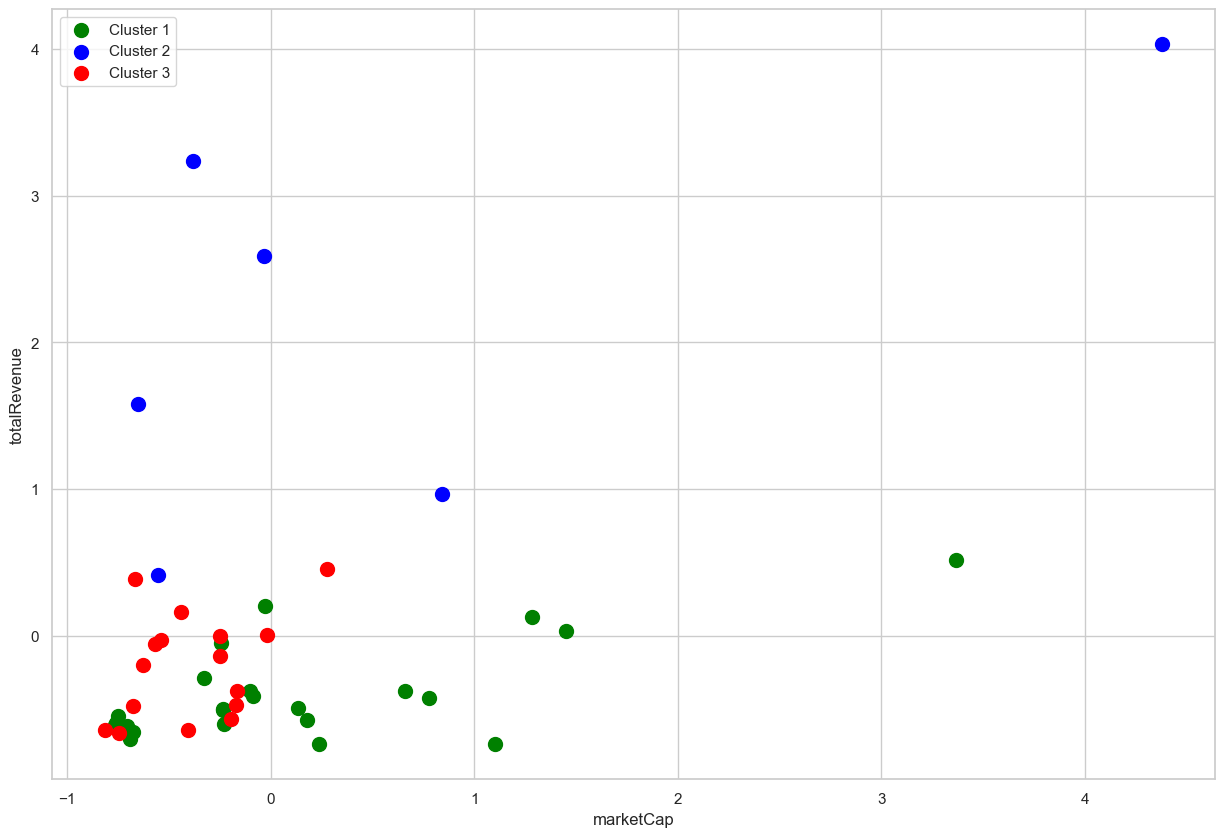

In [25]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(df_viz[df_viz["y_km"] == 0]["marketCap"], df_viz[df_viz["y_km"] == 0]["totalRevenue"], s = 100, c = "Green", label = "Cluster 1")
plt.scatter(df_viz[df_viz["y_km"] == 1]["marketCap"], df_viz[df_viz["y_km"] == 1]["totalRevenue"], s = 100, c = "Blue", label = "Cluster 2")
plt.scatter(df_viz[df_viz["y_km"] == 2]["marketCap"], df_viz[df_viz["y_km"] == 2]["totalRevenue"], s = 100, c = "Red", label = "Cluster 3")
plt.xlabel("marketCap")
plt.ylabel("totalRevenue")
plt.legend()
plt.show()

In [26]:
# K-Means random state 2
km2 = KMeans(n_clusters = 3, init = "random")
y_km2 = km2.fit_predict(df_scaled)
df_viz["y_km2"] = y_km2

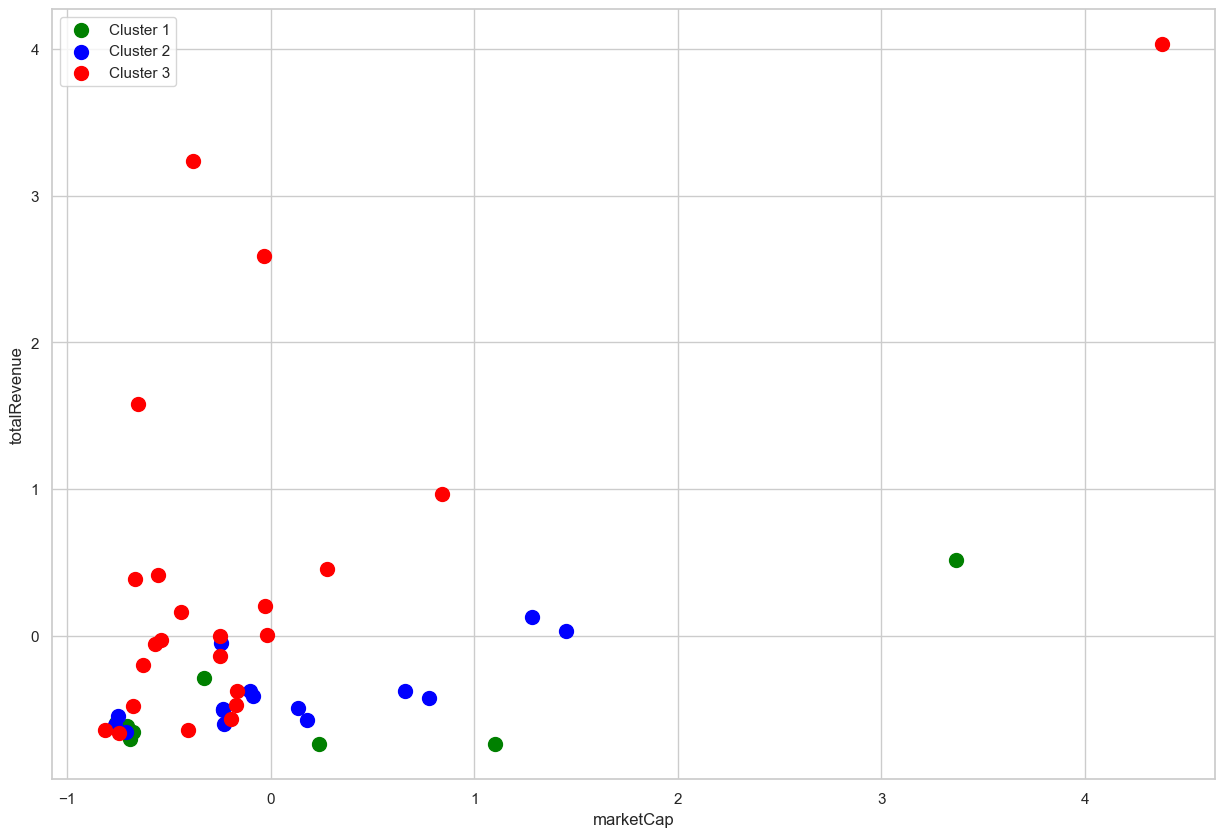

In [27]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(df_viz[df_viz["y_km2"] == 0]["marketCap"], df_viz[df_viz["y_km2"] == 0]["totalRevenue"], s = 100, c = "Green", label = "Cluster 1")
plt.scatter(df_viz[df_viz["y_km2"] == 1]["marketCap"], df_viz[df_viz["y_km2"] == 1]["totalRevenue"], s = 100, c = "Blue", label = "Cluster 2")
plt.scatter(df_viz[df_viz["y_km2"] == 2]["marketCap"], df_viz[df_viz["y_km2"] == 2]["totalRevenue"], s = 100, c = "Red", label = "Cluster 3")
plt.xlabel("marketCap")
plt.ylabel("totalRevenue")
plt.legend()
plt.show()

In [28]:
# K-Means random state 3
km3 = KMeans(n_clusters = 3, init = "random")
y_km3 = km3.fit_predict(df_scaled)
df_viz["y_km3"] = y_km3

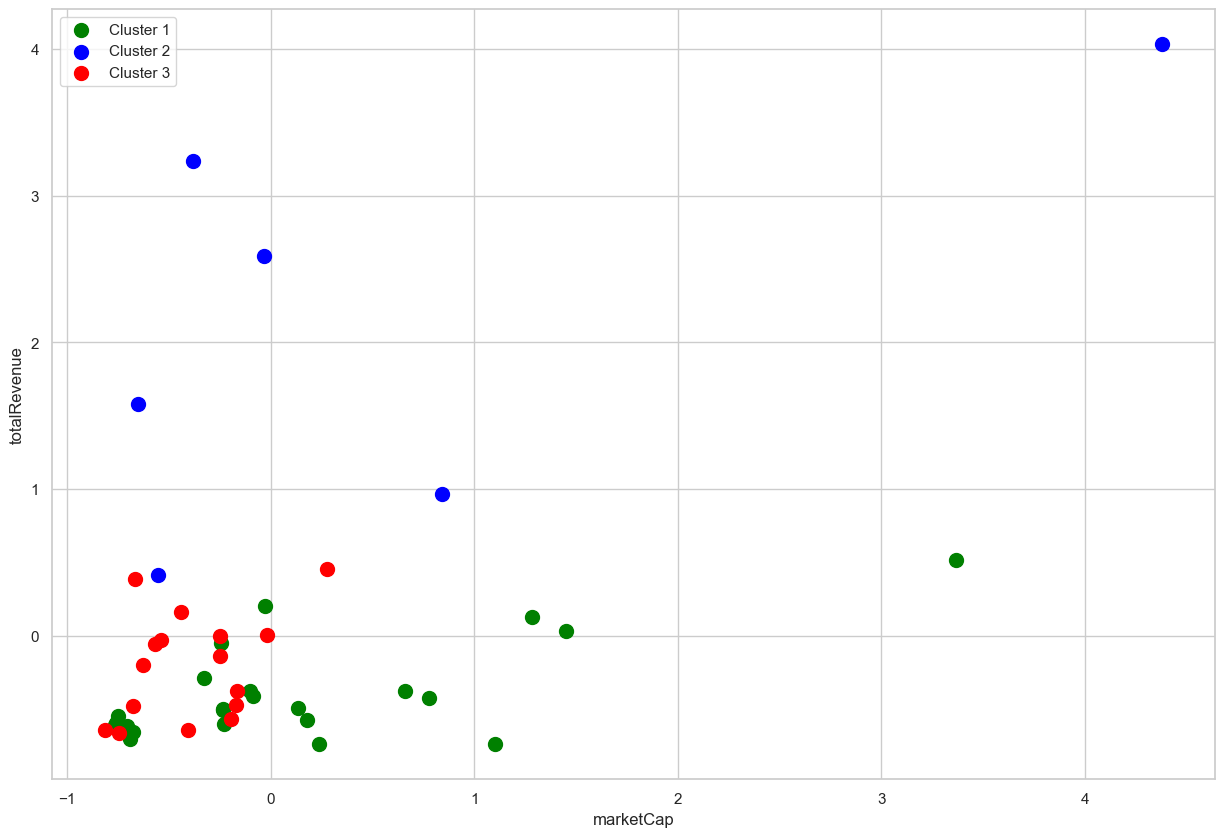

In [29]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(df_viz[df_viz["y_km3"] == 0]["marketCap"], df_viz[df_viz["y_km3"] == 0]["totalRevenue"], s = 100, c = "Green", label = "Cluster 1")
plt.scatter(df_viz[df_viz["y_km3"] == 1]["marketCap"], df_viz[df_viz["y_km3"] == 1]["totalRevenue"], s = 100, c = "Blue", label = "Cluster 2")
plt.scatter(df_viz[df_viz["y_km3"] == 2]["marketCap"], df_viz[df_viz["y_km3"] == 2]["totalRevenue"], s = 100, c = "Red", label = "Cluster 3")
plt.xlabel("marketCap")
plt.ylabel("totalRevenue")
plt.legend()
plt.show()

The above 3 scenarios clearly show that random initialization of centroids is not the way to go. There are 2 ways to deal with this,
1. Run the algorithm multiple times and evaluate metrics like WCSS, Dunn Index, Silhouette Score for each run.
2. K-Means++.

# K-Means++
K-Means++ address the initialization issues by strategically selecting the intial centroids. It aims to spread out the initial centroid selected, leading to a more robust clustering process.

### Key Idea of K-Means++
- Probability-based Selection: The likelihood of a data point becoming a centroid is proportional to the squared distance of that point from the closest existing centroid.
- In simpler terms, points further away from the existing centroids have a higher chance of being chosen as the next centroid. This encourages diversification in the initial centroid placement.

### KMeans ++ Initialization Steps
Say that 4 centroids have to be initialized (K = 4),
1. Choose the first centroid: Randomly select the first centroid C1 from the dataset. This is done just like in standard KMeans, ensuring that every data point is equally likely to be chosen as the initial centroid.
2. Calculate the distance for the remaining points: For each data point x in dataset, calculate the distance D(x) from x to the nearest chosen centroid. Since there is only one centroid at this stage, D(x) will be the distance from x to C1.
3. Choose the second centroid: Choose the next centroid C2 from the remaining data points, where the probability of choosing point x as the next centroid is proportional to D(x) ** 2. This means points further away from the first centroid are more likely to be selected as the second centroid.
4. Update distance: After selecting C2, update D(x) for each data point x in the dataset. Now D(x) will be the distance to the nearest centroid, which could be either C1 or C2.
5. Choose the third centroid: Again, choose the next centroid C3 from the remaining data points, with the probability of choosing point x as the next centroid being proportional to D(x) ** 2, based on the updated distances.
6. Update distances again: After selecting C3, update D(x) for each data point x, considering the nearest centroid among C1, C2 and C3.
7. Choose the fourth centroid: Choose the fourth centroid C4 using the same probabilistic method, based on the distances D(x) to the nearest of the already chosen centroids C1, C2 and C3.

In a nutshell,
1. Randomly select the first centroid from the data points.
2. Calculate the distance of each remaining data point to the chosen centroid.
3. Select the next centroid probabilistically, with higher distances having a higher chance of being selected.
4. Repeat steps 2 and 3 until all K centroids are chosen.

### Benefits of K-Means++
Compared to random initialization K-Means++ leads to,
- Improved cluster quality: Clusters are more likely to capture the true structure of the data.
- Reduced sensitivity to initial placement: The algorithm is less prone to getting stuch in the local optima.

### Important Caveats
- K-Means++ does not guarantee optimal clustering, but it significantly improves the starting point for K-Means iterations.
- Other factors like choosing the right number of clusters (K), can still impact the final results.

# K-Means v. K-Means++
### K-Means Algorithm
1. Initialization: Randomly select K points as the initial centroids from the dataset.
2. Assignment Step: Assign each data point to the nearest centroid based on the distance metric (usually Euclidean distance), forming K clusters.
3. Update Step: Recalculate the centroids as the mean of all points in each cluster.
4. Repeat: Repeat the assignment and update steps until the centroids no longer change significantly, indicating convergence.

### K-Means++ Algorithm
1. Initialization:
    - Randomly select the first centroid from the data points.
    - For each data point, compute the distance from the point to the nearest, already chosen centroid.
    - Select the next centroid from the data points with a probability proportional to the square of the distance to the nearest existing centroid. This step increases the chances of spreading out the initial centroids.
    - Repeat the above step until K centroids are chosen.
2. Assignment step: Same as K-Means.
3. Update Step: Same as K-Means.
4. Repeat: Same as K-Means.

# Limitations of K-Means and K-Means++
1. Sensitivity to Initial Centroids:
    - K-Means: Highly sensitive to initial placement of centroids, which can lead to suboptimal clustering. Random initialization can result in different results on different runs.
    - K-Means++: Designed to mitigate this issure by spreading out initial centroids, but it still does not guarantee a global optimum.
2. Number of Clusters: both algorithms require the number of clusters (K) to be specified in advance, which is not always practical or intuitive, especially when the structure of the data is unknown.
3. CLuster Shape and Size: Both algorithms assumes that clusters are spherical and roughly of the same size, which makes them perform poorly on datasets with complex shapes or widely varying densities.
4. Outliers: Both the algorithms are sensitive to outliers. Outliers can significantly skew the centroids of the clusters leading to incorrect clustering.
5. Convergence to Local Minima:
    - K-Means: Can easily converge to local minimum, especially with poor initialization. This might not be the best possible solution.
    - K-Means++: Less prone to local minima due to smarter initialization, but it is not still not immune to this issue.
6. Scalability: While greatly efficient, both algorithms can struggle with very large datasets due to the need to compute distances between each point and each centroid at every iteration.
7. Categorical Data: Both algorithms are inherently designed for numerical data and do not naturally handle categorical variables. Special adaptations or pre-processing (like OHE) are needed, which might not always be effective.
8. Feature Space: Performance can degrade in high-dimensional spaces due to the "curse of dimensionality", where distance measures become less meaningful.
9. Deterministic Output:
    - K-Means: The final output can vary between runs due to random initialization.
    - K-Means++: Although the initialization is smarter, the final output can still be influenced by the stochastic nature of the initialization process.